https://mp.weixin.qq.com/s?__biz=MzIwOTc2MTUyMg==&mid=2247496583&idx=3&sn=1313d3f3910a309ec6fa562265b979aa&chksm=976c561aa01bdf0c16f8556d7c6c253c006a85e7cf7959b61fdf224c1823b3fda38a7df352ee&scene=21#wechat_redirect

### 1.1 静态连续变量

##### 1.1.1 离散化

In [1]:
# 1.1.1.1 二值化

In [2]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Frequency')

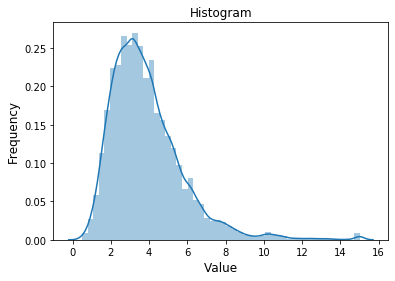

In [3]:
dataset = fetch_california_housing()
X,y = dataset.data,dataset.target
fig,ax = plt.subplots()
sns.distplot(X[:,0],hist=True,kde=True)
ax.set_title('Histogram', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [4]:
from sklearn.preprocessing import Binarizer
sample_columns = X[0:10,0]
# print(sample_columns.reshape(-1,1))
model = Binarizer(threshold=6)
result = model.fit_transform(sample_columns.reshape(-1,1)).reshape(-1)
print(result)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# 1.1.1.2 分箱
from sklearn.preprocessing import KBinsDiscretizer
test_set = X[0:10,0]
train_set = X[10:,0]
model = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)
bin_dege = model.bin_edges_[0]

In [6]:
bin_dege

array([ 0.4999 ,  3.39994,  6.29998,  9.20002, 12.10006, 15.0001 ])

Text(0, 0.5, 'Frequency')

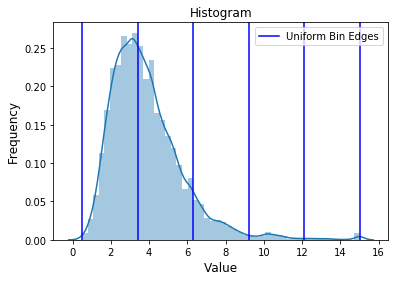

In [7]:
# vusualiza the bin edges
fig,ax = plt.subplots()
sns.distplot(train_set,hist=True,kde=True)
for edge in bin_dege:
    line = plt.axvline(edge,color='b')
ax.legend([line],['Uniform Bin Edges'], fontsize=10)
ax.set_title('Histogram', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [8]:
# 分位数分箱
from sklearn.preprocessing import KBinsDiscretizer
test_set = X[0:10,0]
train_set = X[10:,0]
model = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)
bin_edge = model.bin_edges_[0]

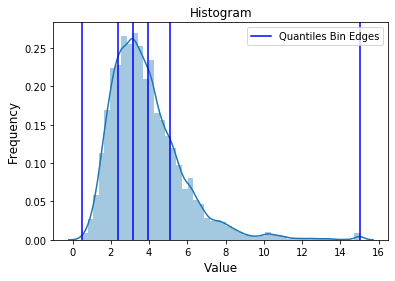

In [9]:
# visualiza the bin edges
fig, ax = plt.subplots()
sns.distplot(train_set, hist = True, kde=True)

for edge in bin_edge: # quantile based bins
    line = plt.axvline(edge, color='b')
ax.legend([line], ['Quantiles Bin Edges'], fontsize=10)
ax.set_title('Histogram', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

#### 1.1.2缩放

In [10]:
# 1.1.2.1标准缩放（Z分数标准化）
from sklearn.preprocessing import StandardScaler
test_set = X[0:10,0]
train_set = X[10:,0]
model = StandardScaler()
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)

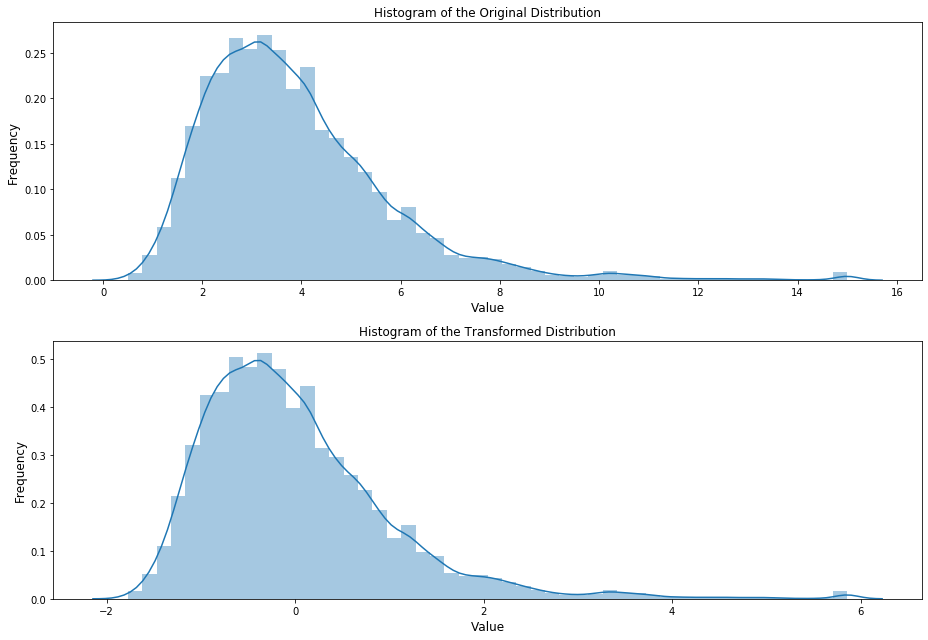

In [11]:
# visualize the distribution after the scaling
# fit and transform the entire first feature

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('Histogram of the Original Distribution', fontsize=12)
ax[0].set_xlabel('Value', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12); # this feature has long-tail distribution

model = StandardScaler()
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# show the distribution of the entire feature
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('Histogram of the Transformed Distribution', fontsize=12)
ax[1].set_xlabel('Value', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12); # the distribution is the same, but scales change
fig.tight_layout()

In [12]:
# 1.1.2.2 MinMaxScaler（按数值范围缩放）
from sklearn.preprocessing import MinMaxScaler
test_set = X[0:10,0]
train_set = X[10:,0]
model = MinMaxScaler(feature_range=(0,1))
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)

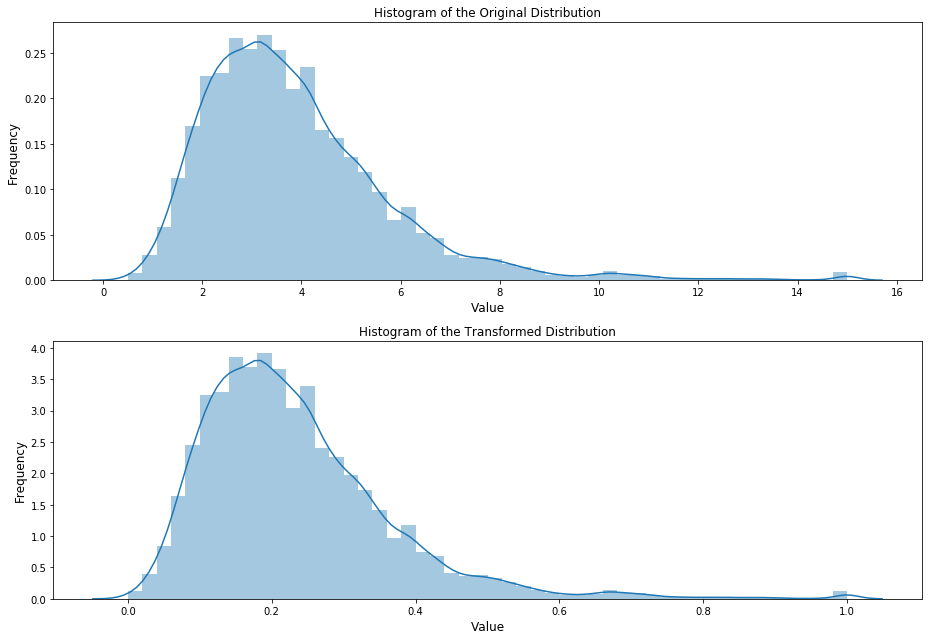

In [13]:

# visualize the distribution after the scaling
# fit and transform the entire first feature

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('Histogram of the Original Distribution', fontsize=12)
ax[0].set_xlabel('Value', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12); # this feature has long-tail distribution

model = MinMaxScaler(feature_range=(0,1))
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# show the distribution of the entire feature
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('Histogram of the Transformed Distribution', fontsize=12)
ax[1].set_xlabel('Value', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12); # the distribution is the same, but scales change
fig.tight_layout() # now the scale change to [0,1]

In [14]:
# 1.1.2.3 RobustScaler（抗异常值缩放）
import numpy as np
from sklearn.preprocessing import RobustScaler
test_set = X[0:10,0]
train_set = X[10:,0]
model = RobustScaler(with_centering=True,with_scaling=True,quantile_range=(25.0,75.0))
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)

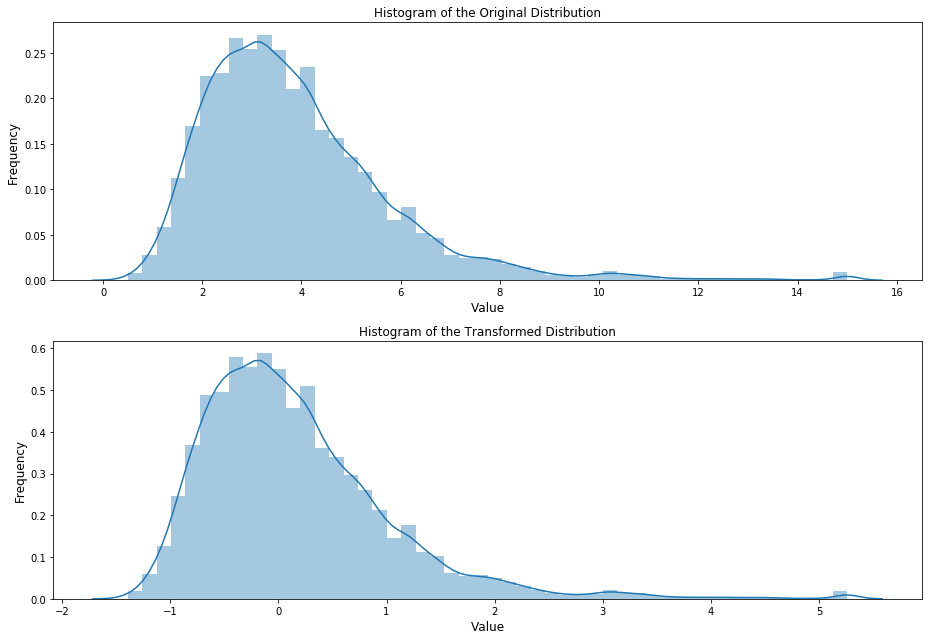

In [15]:

# visualize the distribution after the scaling
# fit and transform the entire first feature

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('Histogram of the Original Distribution', fontsize=12)
ax[0].set_xlabel('Value', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12); # this feature has long-tail distribution

model = RobustScaler(with_centering = True, with_scaling = True, 
                    quantile_range = (25.0, 75.0))
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# show the distribution of the entire feature
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('Histogram of the Transformed Distribution', fontsize=12)
ax[1].set_xlabel('Value', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12); # the distribution is the same, but scales change
fig.tight_layout()

In [16]:
# 1.1.2.4 幂次变换（非线性变换）
# Box-Cox变换
from sklearn.preprocessing import PowerTransformer
test_set = X[0:10,0]
train_set = X[10:,0]
model = PowerTransformer(method='box-cox',standardize=True)
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)

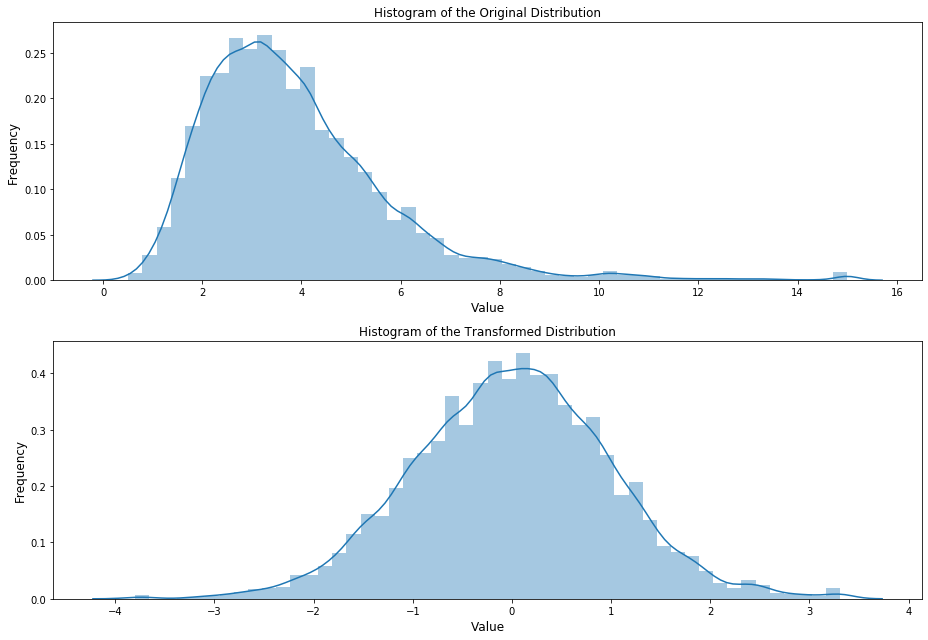

In [17]:
# visualize the distribution after the scaling
# fit and transform the entire first feature

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('Histogram of the Original Distribution', fontsize=12)
ax[0].set_xlabel('Value', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12); # this feature has long-tail distribution

model = PowerTransformer(method='box-cox', standardize=True)
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# show the distribution of the entire feature
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('Histogram of the Transformed Distribution', fontsize=12)
ax[1].set_xlabel('Value', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12); # the distribution now becomes normal
fig.tight_layout()


In [18]:
# Yeo-Johnson变换
from sklearn.preprocessing import PowerTransformer
test_set = X[0:10,0]
train_set = X[10:,0]
model = PowerTransformer(method='yeo-johnson',standardize=True)
model.fit(train_set.reshape(-1,1))
result = model.transform(test_set.reshape(-1,1)).reshape(-1)

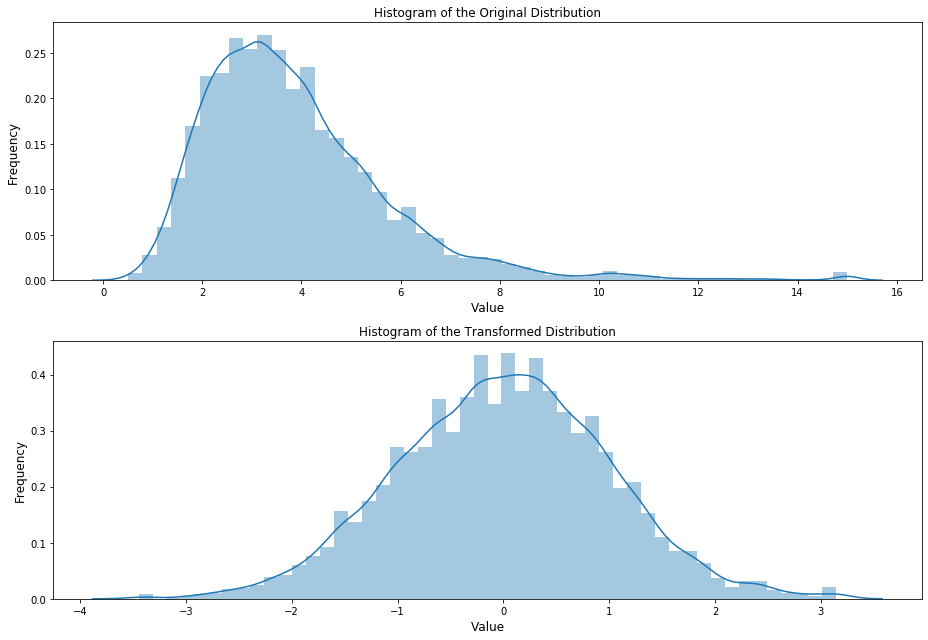

In [19]:

# visualize the distribution after the scaling
# fit and transform the entire first feature

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('Histogram of the Original Distribution', fontsize=12)
ax[0].set_xlabel('Value', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12); # this feature has long-tail distribution

model = PowerTransformer(method='yeo-johnson', standardize=True)
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# show the distribution of the entire feature
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('Histogram of the Transformed Distribution', fontsize=12)
ax[1].set_xlabel('Value', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12); # the distribution now becomes normal
fig.tight_layout() 

#### 1.1.3 正则化

In [20]:
# l1正则化
from sklearn.preprocessing import Normalizer
sample_columns = X[0:2,0:3]
model = Normalizer(norm='l1')
model.fit(sample_columns)
result = model.transform(sample_columns)

In [21]:
# l2正则化
from sklearn.preprocessing import Normalizer
sample_columns = X[0:2,0:3]
model = Normalizer(norm='l2')
model.fit(sample_columns)
result = model.transform(sample_columns)

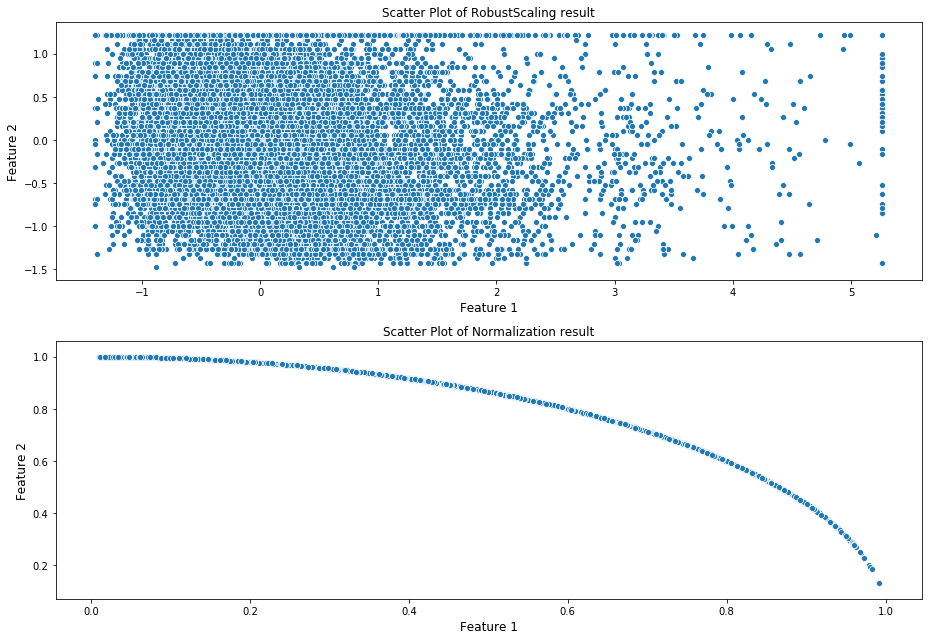

In [22]:
# visualize the difference in the distribuiton after Normalization
# compare it with the distribuiton after RobustScaling
# fit and transform the entire first & second feature

import seaborn as sns
import matplotlib.pyplot as plt

# RobustScaler
fig, ax = plt.subplots(2,1, figsize = (13,9))

model = RobustScaler(with_centering = True, with_scaling = True, 
                    quantile_range = (25.0, 75.0))
model.fit(X[:,0:2]) 
result = model.transform(X[:,0:2])

sns.scatterplot(result[:,0], result[:,1], ax=ax[0])
ax[0].set_title('Scatter Plot of RobustScaling result', fontsize=12)
ax[0].set_xlabel('Feature 1', fontsize=12)
ax[0].set_ylabel('Feature 2', fontsize=12);

model = Normalizer(norm='l2')

model.fit(X[:,0:2]) 
result = model.transform(X[:,0:2])

sns.scatterplot(result[:,0], result[:,1], ax=ax[1])
ax[1].set_title('Scatter Plot of Normalization result', fontsize=12)
ax[1].set_xlabel('Feature 1', fontsize=12)
ax[1].set_ylabel('Feature 2', fontsize=12);
fig.tight_layout()  # Normalization distort the original distribution

#### 1.1.4 缺失值的估算

In [23]:
# 1.1.4.1 单变量特征插补
from sklearn.impute import SimpleImputer
test_set = X[0:10,0].copy()
test_set[3] = np.nan
test_set[6] = np.nan
train_set = X[10:,0].copy()
train_set[3] = np.nan
train_set[6] = np.nan
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(train_set.reshape(-1,1))
result = imputer.transform(test_set.reshape(-1,1)).reshape(-1)

In [24]:
# 1.1.4.2 多元特征插补
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
test_set = X[0:19,:].copy()
test_set[3,0] = np.nan
test_set[6,0] = np.nan
test_set[3,1] = np.nan
train_set = X[10:,:].copy()
train_set[3,0] = np.nan
train_set[6,0] = np.nan
train_set[3,1] = np.nan
impute_estimator = BayesianRidge()
imputer = IterativeImputer(max_iter=10,random_state=0,estimator=impute_estimator)
imputer.fit(train_set)
result = imputer.transform(test_set)[:,0]

In [25]:
# 使用基于树的模型（以 ExtraTrees 为例）
from sklearn.experimental import enable_iterative_imputer # have to import this to enable
# IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

test_set = X[0:10,:].copy() # no missing values, select all features
# the first columns is
# array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# manully create some missing values
test_set[3,0] = np.nan
test_set[6,0] = np.nan
test_set[3,1] = np.nan
# now the first feature becomes 
# array([8.3252, 8.3014, 7.2574,    nan, 3.8462, 4.0368,    nan, 3.12 ,2.0804, 3.6912])

# create the test samples
# in real-world, we should fit the imputer on train set and tranform the test set.
train_set = X[10:,:].copy()
train_set[3,0] = np.nan
train_set[6,0] = np.nan
train_set[3,1] = np.nan

impute_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
# parameters can be turned in CV though sklearn pipeline
imputer = IterativeImputer(max_iter = 10, 
                           random_state = 0, 
                           estimator = impute_estimator)

imputer.fit(train_set)
result = imputer.transform(test_set)[:,0] # only select the first column to revel how it works
# return array([8.3252 , 8.3014 , 7.2574 , 4.63813, 3.8462 , 4.0368 , 3.24721,
# 3.12   , 2.0804 , 3.6912 ])

In [26]:
# 使用K近邻（KNN）
from sklearn.experimental import enable_iterative_imputer # have to import this to enable
# IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

test_set = X[0:10,:].copy() # no missing values, select all features
# the first columns is
# array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# manully create some missing values
test_set[3,0] = np.nan
test_set[6,0] = np.nan
test_set[3,1] = np.nan
# now the first feature becomes 
# array([8.3252, 8.3014, 7.2574,    nan, 3.8462, 4.0368,    nan, 3.12 ,2.0804, 3.6912])

# create the test samples
# in real-world, we should fit the imputer on train set and tranform the test set.
train_set = X[10:,:].copy()
train_set[3,0] = np.nan
train_set[6,0] = np.nan
train_set[3,1] = np.nan

impute_estimator = KNeighborsRegressor(n_neighbors=10, 
                                       p = 1)  # set p=1 to use manhanttan distance
# use manhanttan distance to reduce effect from outliers

# parameters can be turned in CV though sklearn pipeline
imputer = IterativeImputer(max_iter = 10, 
                           random_state = 0, 
                           estimator = impute_estimator)

imputer.fit(train_set)
result = imputer.transform(test_set)[:,0] # only select the first column to revel how it works
# return array([8.3252, 8.3014, 7.2574, 3.6978, 3.8462, 4.0368, 4.052 , 3.12  ,
# 2.0804, 3.6912])

In [27]:
# 1.1.4.3 标记估算值
# 有时，某些缺失值可能是有用的，因此，scikit-learn还提供了将缺少值的数据集转换
# 为相应的二进制矩阵的功能，该矩阵指示数据集中缺少值的存在
from sklearn.impute import MissingIndicator
train_set = X[10:,:].copy() # select all features
train_set[3,0] = np.nan # manully create some missing values
train_set[6,0] = np.nan
train_set[3,1] = np.nan
indicator = MissingIndicator(missing_values=np.nan,features='all')
result = indicator.fit_transform(train_set)
result[:,0].sum()
result[:,1].sum()

1

#### 1.1.5 特征变换

In [29]:
# 1.1.5.1 多项式变换
from sklearn.preprocessing import PolynomialFeatures
train_set = np.array([2,3]).reshape(1,-1)
poly = PolynomialFeatures(degree=3,interaction_only=False)
result = poly.fit_transform(train_set)

In [30]:
# 1.1.5.2 自定义变换
from sklearn.preprocessing import FunctionTransformer
train_set = np.array([2,3]).reshape(1,-1)
transformer = FunctionTransformer(func=np.log1p,validate=True)
result = transformer.transform(train_set)